# Auto_Ml on a subset of the datacube

In [6]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import harmonize as hz

In [7]:
# Open the dataset with xarray
path_data = "../data/final/"

In [8]:
# Open the datacube5 as an xarray dataset
datacube = xr.open_dataset(path_data+ 'final_datacube_gps.nc')

In [9]:
datacube

<xarray.Dataset>
Dimensions:                 (x: 309, y: 182, time: 4019)
Coordinates:
  * x                       (x) float64 4.08 4.09 4.1 4.11 ... 7.112 7.122 7.132
  * y                       (y) float64 45.25 45.24 45.23 ... 43.48 43.47 43.46
  * time                    (time) object 2010-01-01 00:00:00 ... 2021-01-01 ...
    band                    int32 ...
Data variables: (12/25)
    crs                     int32 ...
    ET_500m                 (time, y, x) float32 ...
    Fpar_500m               (time, y, x) float64 ...
    spatial_ref             int32 ...
    density                 (y, x) float32 ...
    u10                     (time, y, x) float64 ...
    ...                      ...
    v10_mean                (time, y, x) float64 ...
    t2m_mean                (time, y, x) float64 ...
    tp_mean                 (time, y, x) float64 ...
    LST_Day_1km_mean        (time, y, x) float64 ...
    LST_Night_1km_mean      (time, y, x) float64 ...
    _1_km_16_days_EVI_mean  (time, y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-15 13:57:35 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

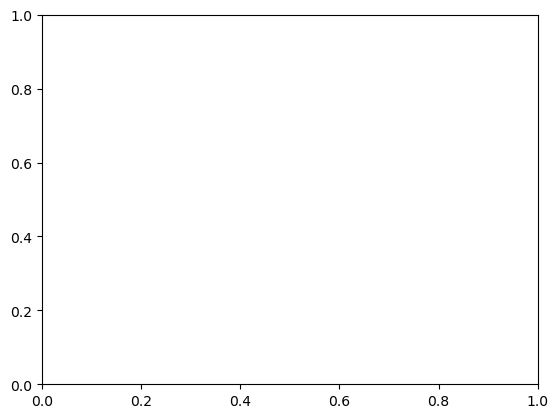

In [10]:
#Plot the t2m_mean variable along the time dimension for a single pixel
datacube.t2m_mean.isel(x=100, y=100).plot()


In [5]:
# print the percentage of missing values
print(datacube.isnull().sum()/datacube.count())

<xarray.Dataset>
Dimensions:            ()
Coordinates:
    band               int32 1
Data variables: (12/16)
    crs                float64 0.0
    ET_500m            float64 0.06787
    Fpar_500m          float64 0.07374
    spatial_ref        float64 0.0
    density            float64 0.1356
    u10                float64 0.3252
    ...                 ...
    Last_Day           float64 0.0733
    Burn_Date          float64 0.0733
    FireMask           float64 0.06188
    LST_Day_1km        float64 0.06444
    LST_Night_1km      float64 0.06429
    _1_km_16_days_EVI  float64 0.06188


In [10]:
# Cut the original datacube to a smaller one: half of the full time
datacube = datacube.isel(time=slice(180, 250))


We have a data set with 16 columns and datarray 19,696,656 rows. Let's look at the columns.


In [11]:
df = datacube.to_dataframe()

In [12]:
df.head(20)

band  crs  ET_500m  Fpar_500m  \
x        y         time                                                 
4.079935 45.253379 2010-06-30 00:00:00     1    0      NaN        NaN   
                   2010-07-01 00:00:00     1    0      NaN        NaN   
                   2010-07-02 00:00:00     1    0      NaN        NaN   
                   2010-07-03 00:00:00     1    0      NaN        NaN   
                   2010-07-04 00:00:00     1    0      NaN        NaN   
                   2010-07-05 00:00:00     1    0      NaN        NaN   
                   2010-07-06 00:00:00     1    0      NaN        NaN   
                   2010-07-07 00:00:00     1    0      NaN        NaN   
                   2010-07-08 00:00:00     1    0      NaN        NaN   
                   2010-07-09 00:00:00     1    0      NaN        NaN   
                   2010-07-10 00:00:00     1    0      NaN        NaN   
                   2010-07-11 00:00:00     1    0      NaN        NaN   
                   2010-07-12 00:00:00     1    0      NaN        NaN   
                   2010-07-13 00:00:00     1    0      NaN        NaN   
                   2010-07-14 00:00:00     1    0      NaN        NaN   
                   2010-07-15 00:00:00     1    0      NaN        NaN   
                   2010-07-16 00:00:00     1    0      NaN        NaN   
                   2010-07-17 00:00:00     1    0      NaN        NaN   
                   2010-07-18 00:00:00     1    0      NaN        NaN   
                   2010-07-19 00:00:00     1    0      NaN        NaN   

                                        spatial_ref  density  u10  v10  t2m  \
x        y         time                                                       
4.079935 45.253379 2010-06-30 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-01 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-02 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-03 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-04 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-05 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-06 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-07 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-08 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-09 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-10 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-11 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-12 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-13 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-14 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-15 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-16 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-17 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-18 00:00:00            0      NaN  NaN  NaN  NaN   
                   2010-07-19 00:00:00            0      NaN  NaN  NaN  NaN   

                                        tp  First_Day  Last_Day  Burn_Date  \
x        y         time                                                      
4.079935 45.253379 2010-06-30 00:00:00 NaN        NaN       NaN        NaN   
                   2010-07-01 00:00:00 NaN        NaN       NaN        NaN   
                   2010-07-02 00:00:00 NaN        NaN       NaN        NaN   
                   2010-07-03 00:00:00 NaN        NaN       NaN        NaN   
                   2010-07-04 00:00:00 NaN        NaN       NaN        NaN   
                   2010-07-05 00:00:00 NaN        NaN       NaN        NaN   
                   2010-07-06 00:00:00 NaN        NaN       NaN       

In [13]:
# Drop the columns we don't need: crs, band, spatial_ref
df = df.drop(columns=['crs', 'band', 'spatial_ref'])

In [14]:
# Count the percentage of missing values in each column
df.isnull().sum() / len(df)

ET_500m              0.064034
Fpar_500m            0.068672
density              0.119421
u10                  0.245226
v10                  0.245226
t2m                  0.245226
tp                   0.245226
First_Day            0.068281
Last_Day             0.068281
Burn_Date            0.068281
FireMask             0.058270
LST_Day_1km          0.058270
LST_Night_1km        0.058270
_1_km_16_days_EVI    0.058270
dtype: float64

In [15]:
# Drop all the missing values
df = df.dropna()

In [16]:
# Check the percentage of missing values in each column
df.isnull().sum() / len(df)

ET_500m              0.0
Fpar_500m            0.0
density              0.0
u10                  0.0
v10                  0.0
t2m                  0.0
tp                   0.0
First_Day            0.0
Last_Day             0.0
Burn_Date            0.0
FireMask             0.0
LST_Day_1km          0.0
LST_Night_1km        0.0
_1_km_16_days_EVI    0.0
dtype: float64

In [14]:
# Structure of the dataframe
df.shape

(15570006, 14)

In [15]:
# Count the number of unique values in FireMask
df['FireMask'].value_counts()

5.0    14993489
4.0      534871
3.0       40726
8.0         848
9.0          48
7.0          24
Name: FireMask, dtype: int64

In [16]:
# Change the value of FireMAsk to 0 and 1. 0 = no fire, 1 = fire . If FireMask is 7,8,9 then it is a fire. If not, it is not a fire.
df['FireMask'] = df['FireMask'].replace([0,1,2,3,4,5,6], 0)
df['FireMask'] = df['FireMask'].replace([7,8,9], 1)


In [17]:
# Counthe number of fires and no fires
df['FireMask'].value_counts()


0.0    15569086
1.0         920
Name: FireMask, dtype: int64

In [19]:
# Keep all the observations with FireMask = 1 and keep 1000 observations with FireMask = 0 randomly
df = df[df['FireMask'] == 1].append(df[df['FireMask'] == 0].sample(n=1000, random_state=1))


C:\Users\Quentin\AppData\Local\Temp\ipykernel_12056\2366296675.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df[df['FireMask'] == 1].append(df[df['FireMask'] == 0].sample(n=1000, random_state=1))


In [20]:
df['FireMask'].value_counts()

0.0    1000
1.0     920
Name: FireMask, dtype: int64

In [22]:
# export the dataframe to a csv file
df.to_csv(path_data + 'datacube_balanced.csv')

In [25]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'